In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# تحميل مجموعة البيانات
df_ad = pd.read_csv('Advertising.csv')

# عرض أول 5 صفوف من DataFrame
print("First 5 rows of the Advertising dataset:")
print(df_ad.head())

# إزالة العمود 'Unnamed: 0' لأنه عمود فهرس غير ذي صلة
df_ad = df_ad.drop('Unnamed: 0', axis=1)
print("\nDataFrame after dropping 'Unnamed: 0' column:")
print(df_ad.head())

First 5 rows of the Advertising dataset:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

DataFrame after dropping 'Unnamed: 0' column:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [2]:
# التحقق من القيم المفقودة
print("\nMissing values in the dataset:")
print(df_ad.isnull().sum())

# عرض الإحصائيات الوصفية
print("\nDescriptive statistics of the dataset:")
print(df_ad.describe())


Missing values in the dataset:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Descriptive statistics of the dataset:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


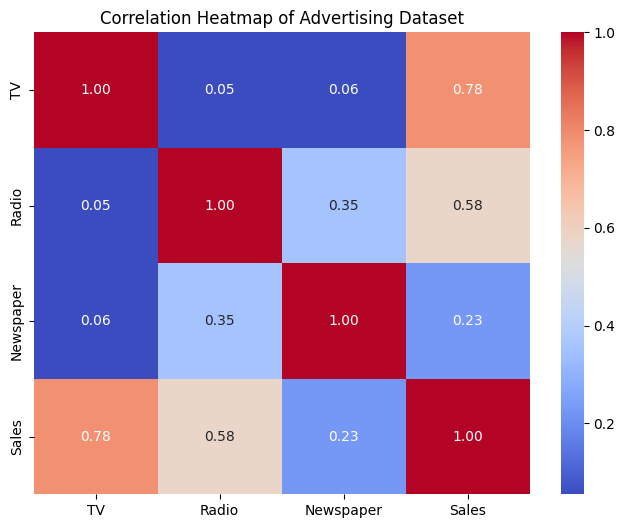

In [3]:
# رسم خريطة الارتباط
plt.figure(figsize=(8, 6))
sns.heatmap(df_ad.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Advertising Dataset')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# تعريف الميزات (X) والهدف (y)
X = df_ad[['TV', 'Radio', 'Newspaper']] # المتغيرات المستقلة
y = df_ad['Sales'] # المتغير التابع

# تقسيم مجموعة البيانات إلى مجموعات تدريب (80%) واختبار (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

# بناء وتدريب نموذج الانحدار الخطي
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# إجراء التنبؤات على مجموعة الاختبار
y_pred = linear_model.predict(X_test)

# تقييم أداء النموذج
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")


Training set shape: X_train: (160, 3), y_train: (160,)
Testing set shape: X_test: (40, 3), y_test: (40,)

Model Evaluation Metrics:
Mean Squared Error (MSE): 3.1741
Mean Absolute Error (MAE): 1.4608
R-squared Score (R2): 0.8994


#الخلاصة:
متوسط الخطأ التربيعي (MSE): 3.1741

متوسط الخطأ المطلق (MAE): 1.4608

معامل التحديد (R2 Score): 0.8994
تشير قيمته البالغة 0.8994 إلى أن حوالي 89.94% من التباين في مبيعات الإعلانات يمكن تفسيره بواسطة ميزانيات إعلانات التلفزيون والراديو والصحف. هذا يعتبر مؤشرًا جيدًا جدًا على أن النموذج يتناسب بشكل جيد مع البيانات ولديه قدرة تنبؤية قوية. تشير قيم MSE و MAE المنخفضة أيضًا إلى أن التنبؤات قريبة من القيم الفعلية.